# Support Vector Machine

## Initialization

Connect to Google Drive:

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/GitHub/emotion-dectection-from-text'

Preparing necessary packages (may need to add more):

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

Select dataset:

In [4]:
X_train = X_train_bow
X_test = X_test_bow

## Basic training

We define and train a model with simple hyperparameter in which kernel is linear, $C = 1.0$, etc:

In [5]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

Evaluate model using preset function:

Score of on train are:
	- Accuracy score: 0.99
	- Micro F1 score: 0.99
	- Macro F1 score: 0.99
Score of on test are:
	- Accuracy score: 0.86
	- Micro F1 score: 0.86
	- Macro F1 score: 0.82


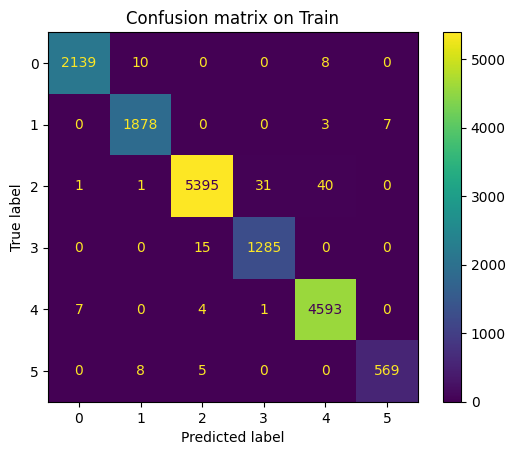

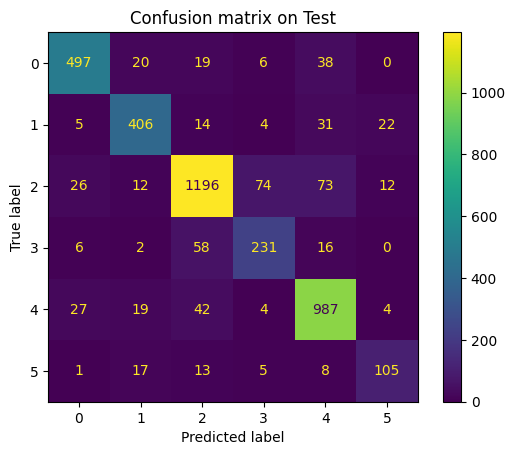

In [6]:
evaluate_model(svm_model, X_train, X_test, y_train, y_test, include_training=True)

This model gives a pretty good score but it seems to be overfitting.

Draw learning curve using preset function:

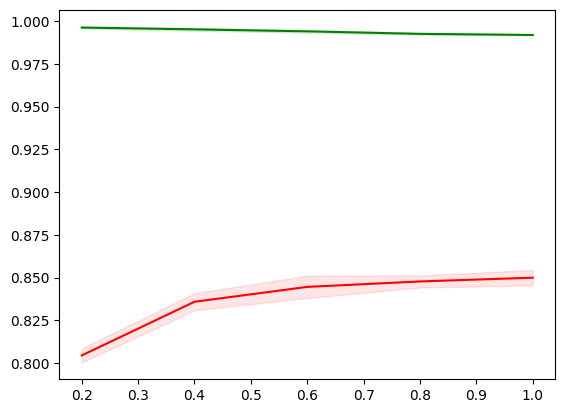

In [7]:
draw_learning_curve(svm_model, X_train, y_train)

**Review**: SVM can result a better result if we do some hyperparameter tunning to resolve the overfitting

## Model selection

This section will be separated in 4 parts for 4 kernels instead of using GridSearchCV in order to get the better result

### Linear function kernel


Formula: $$k(x, z) = x^Tz $$

First, we search in a big range from $0.001$ to $100$

In [8]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    svm_model = SVC(kernel='linear', C=c)
    svm_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, svm_model.predict(X_train))
    cv_score = np.mean(cross_val_score(svm_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3386875, 0.7355, 0.958125, 0.9911875, 0.9925625, 0.992625, 0.9925625]
[0.3386875000000001, 0.6144375, 0.8641249999999999, 0.8499375, 0.8349375, 0.82975, 0.8233749999999999]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

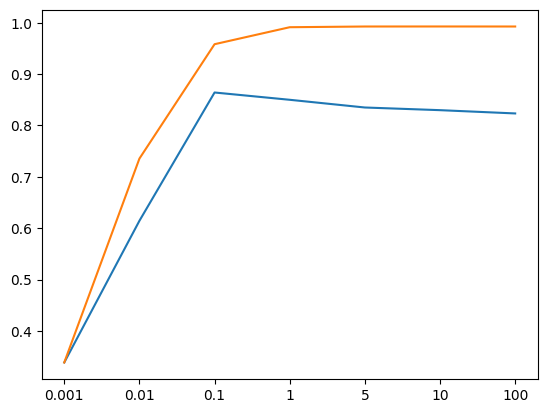

In [9]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

From the result of above section, we can see the good value of $C$ is near the value 0.1.

Scope to $C = 0.1$:

In [10]:
C_list = [0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    svm_model = SVC(kernel='linear', C=c)
    svm_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, svm_model.predict(X_train))
    cv_score = np.mean(cross_val_score(svm_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75]
[0.8898125, 0.9275, 0.9465625, 0.958125, 0.9823125, 0.9883125, 0.9905625]
[0.8304375, 0.8574375, 0.8629374999999999, 0.8641249999999999, 0.860625, 0.8543125, 0.8532499999999998]


[Text(0, 0, '0.025'),
 Text(1, 0, '0.05'),
 Text(2, 0, '0.075'),
 Text(3, 0, '0.1'),
 Text(4, 0, '0.25'),
 Text(5, 0, '0.5'),
 Text(6, 0, '0.75')]

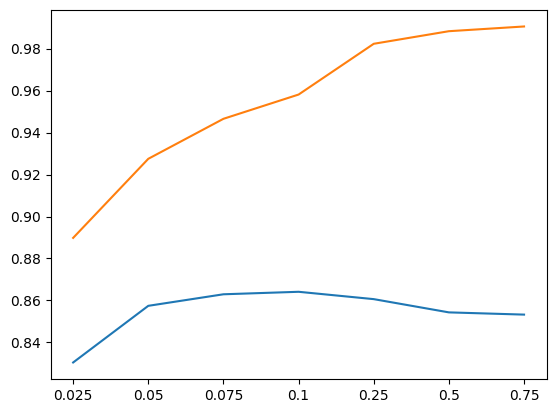

In [11]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

As the result, we can claim that $C = 0.1$ give a model with good accuracy and avoid overfitting. We will test the model again in test set.

In [5]:
best_svm_linear_model = SVC(kernel='linear', C=0.1)

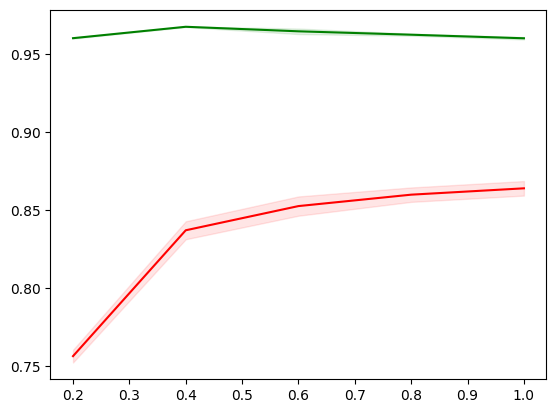

In [6]:
draw_learning_curve(best_svm_linear_model, X_train, y_train)

Score of on train are:
	- Accuracy score: 0.96
	- Micro F1 score: 0.96
	- Macro F1 score: 0.95
Score of on test are:
	- Accuracy score: 0.86
	- Micro F1 score: 0.86
	- Macro F1 score: 0.82


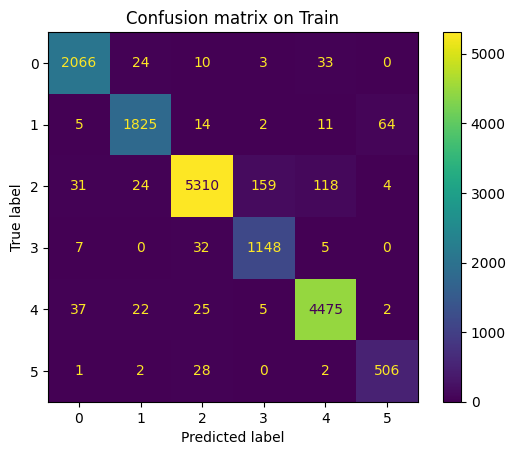

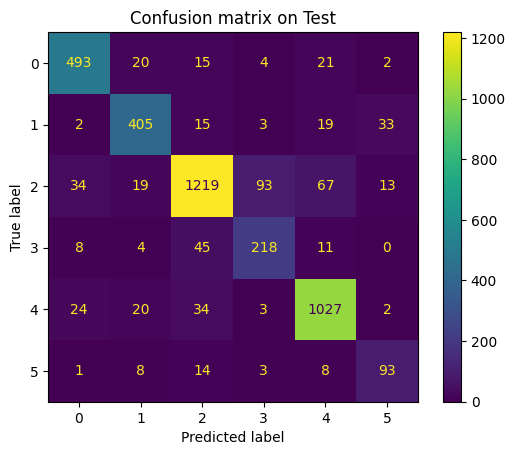

In [7]:
best_svm_linear_model.fit(X_train, y_train)
evaluate_model(best_svm_linear_model, X_train, X_test, y_train, y_test, include_training=True)

### Radial basis function kernel

Formula: $$k(x, z) = e^{-\gamma||x-z||^2_2}$$

First, we using grid search in a big domain.

In [26]:
dict_param = {
    'C' : np.asarray([0.01, 0.1, 1, 10.0, 100]),
    'gamma': np.logspace(-3, 2, 6)
}

grid_search = GridSearchCV(SVC(kernel='rbf'), dict_param, cv = 5, n_jobs=8)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=8,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [33]:
print('Best score: ', grid_search.best_score_, '\n')

print('Bad hyperparameter:')
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    gamma = [val['gamma'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
df = df[df['score'] < 0.8]
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 30 // len(dict_param[param]):
      print(param, value)

Best score:  0.862125 

Bad hyperparameter:
C 0.01
C 0.1
C 1.0
gamma 0.1
gamma 1.0
gamma 10.0
gamma 100.0


We fiter all the parameter that appear in all the bad model (validation accuracy < $0.8$)
* C = 0.01
* C = 0.1
* C = 1
* $\gamma$ = 100.0
* $\gamma$ = 10.0
* $\gamma$ = 1.0

So that we can shrink the range of parameter

We repeat the algorithm again and again until there is no bad parameter to recieve the best model

In [9]:
dict_param = {
    'C' : np.linspace(25, 100, 10),
    'gamma': np.logspace(-3, -2, 10)
}

grid_search = GridSearchCV(SVC(kernel='rbf'), dict_param, cv = 5, n_jobs=8)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=8,
             param_grid={'C': array([ 25.        ,  33.33333333,  41.66666667,  50.        ,
        58.33333333,  66.66666667,  75.        ,  83.33333333,
        91.66666667, 100.        ]),
                         'gamma': array([0.001     , 0.00129155, 0.0016681 , 0.00215443, 0.00278256,
       0.00359381, 0.00464159, 0.00599484, 0.00774264, 0.01      ])})

In [10]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    gamma = [val['gamma'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df[df['score'] == min(df['score'])])

        C     gamma     score
98  100.0  0.007743  0.845313


In [41]:
best_svm_rbf_model = grid_search.best_estimator_
print(best_svm_rbf_model, grid_search.best_score_)

SVC(C=50.0, gamma=0.001291549665014884) 0.8639375000000001


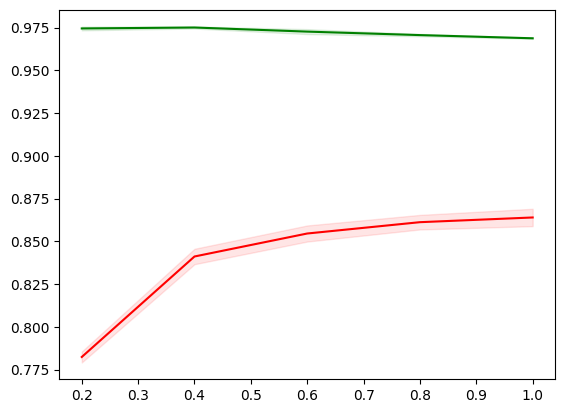

In [42]:
draw_learning_curve(best_svm_rbf_model, X_train, y_train)

Score of on train are:
	- Accuracy score: 0.97
	- Micro F1 score: 0.97
	- Macro F1 score: 0.96
Score of on test are:
	- Accuracy score: 0.86
	- Micro F1 score: 0.86
	- Macro F1 score: 0.82


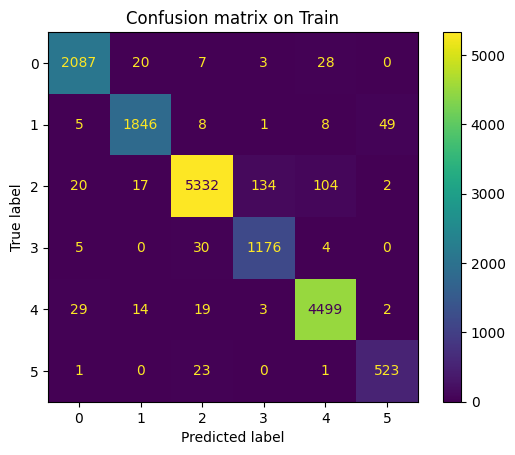

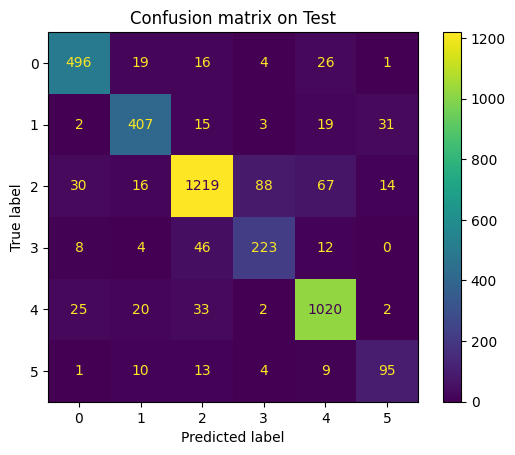

In [43]:
best_svm_rbf_model.fit(X_train, y_train)
evaluate_model(best_svm_rbf_model, X_train, X_test, y_train, y_test, include_training=True)

### Sigmoid function kernel

Formula: $$k(x, z)=  tanh(\gamma x^T z + r)$$

We use the same method in the above section to tuning this kernel

In [44]:
dict_param = {
    'C' : np.asarray([0.001, 0.01, 0.1, 1, 10.0, 100]),
    'gamma': np.asarray([0.001, 0.01, 0.1, 1, 10.0, 100]),
    'coef0': np.asarray([0.001, 0.01, 0.1, 1, 10.0, 100])
}

grid_search = GridSearchCV(SVC(kernel='sigmoid'), dict_param, cv = 5, n_jobs=8)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'), n_jobs=8,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'coef0': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [50]:
print('Best score: ', grid_search.best_score_, '\n')

print('Bad hyperparameter:')
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    gamma = [val['gamma'] for val in grid_search.cv_results_['params']],
    coef0 = [val['coef0'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
df = df[df['score'] < 0.8]

for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 6 * 6:
      print(param, value)

Best score:  0.8641249999999999 

Bad hyperparameter:
C 0.001
C 0.01
C 0.1
gamma 1.0
gamma 10.0
gamma 100.0
coef0 10.0
coef0 100.0


In [51]:
dict_param = {
    'C' : np.linspace(1, 100, 5),
    'gamma': np.linspace(0.001, 0.01, 5),
    'coef0': np.linspace(0.001, 1, 5)
}

grid_search = GridSearchCV(SVC(kernel='sigmoid'), dict_param, cv = 5, n_jobs=8)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'), n_jobs=8,
             param_grid={'C': array([  1.  ,  25.75,  50.5 ,  75.25, 100.  ]),
                         'coef0': array([0.001  , 0.25075, 0.5005 , 0.75025, 1.     ]),
                         'gamma': array([0.001  , 0.00325, 0.0055 , 0.00775, 0.01   ])})

In [55]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    gamma = [val['gamma'] for val in grid_search.cv_results_['params']],
    coef0 = [val['coef0'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
df = df[df['score'] < 0.8]
print(len(df))
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) >= 150 // len(dict_param[param]):
      print(param, value)

27


In [56]:
best_svm_sig_model = grid_search.best_estimator_
print(best_svm_sig_model, grid_search.best_score_)

SVC(C=50.5, coef0=1.0, gamma=0.0055000000000000005, kernel='sigmoid') 0.8643749999999999


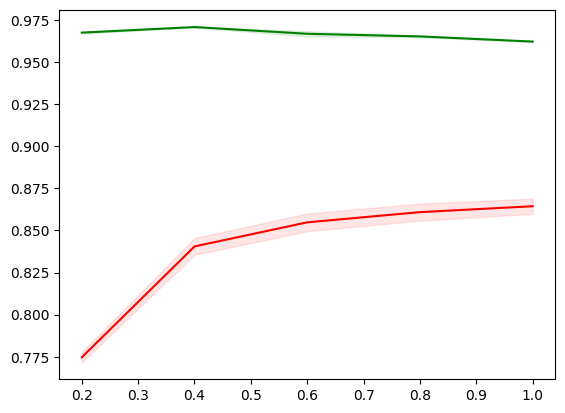

In [57]:
draw_learning_curve(best_svm_sig_model, X_train, y_train)

Score of on train are:
	- Accuracy score: 0.96
	- Micro F1 score: 0.96
	- Macro F1 score: 0.95
Score of on test are:
	- Accuracy score: 0.86
	- Micro F1 score: 0.86
	- Macro F1 score: 0.82


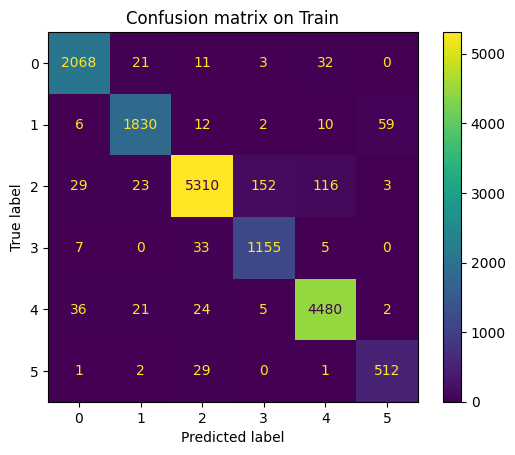

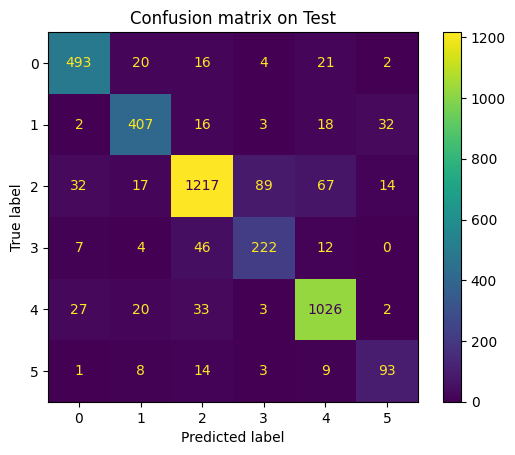

In [58]:
best_svm_sig_model.fit(X_train, y_train)
evaluate_model(best_svm_sig_model, X_train, X_test, y_train, y_test, include_training=True)

### Polynomial function kernel

Formula: $$k(x, z) = (r+\gamma x^T z)^d$$

In [59]:
dict_param = {
    'C' : np.asarray([0.001, 0.01, 0.1, 1, 10.0, 100]),
    'gamma': np.asarray([0.001, 0.01, 0.1, 1]),
    'coef0': np.asarray([0.001, 0.01, 0.1, 1]),
    'degree': np.asarray([2, 3, 4])
}

grid_search = GridSearchCV(SVC(kernel='poly'), dict_param, cv = 5, n_jobs=8)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=8,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'coef0': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'degree': array([2, 3, 4]),
                         'gamma': array([0.001, 0.01 , 0.1  , 1.   ])})

In [62]:
print('Best score: ', grid_search.best_score_, '\n')

print('Bad hyperparameter:')
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    gamma = [val['gamma'] for val in grid_search.cv_results_['params']],
    coef0 = [val['coef0'] for val in grid_search.cv_results_['params']],
    degree = [val['degree'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
df = df[df['score'] < 0.85]

for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 288 // len(dict_param[param]):
      print(param, value)

Best score:  0.8619999999999999 

Bad hyperparameter:
C 0.001
C 0.01
C 0.1
gamma 1.0
coef0 0.001
coef0 0.01


In [67]:
dict_param = {
    'C' : np.linspace(10, 100, 4),
    'gamma': np.linspace(0.001, 0.004, 4),
    'coef0': np.linspace(0.7, 1, 4),
    'degree': np.asarray([2, 3, 4])
}

grid_search = GridSearchCV(SVC(kernel='poly'), dict_param, cv = 5, n_jobs=8)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=8,
             param_grid={'C': array([ 10.,  40.,  70., 100.]),
                         'coef0': array([0.7, 0.8, 0.9, 1. ]),
                         'degree': array([2, 3, 4]),
                         'gamma': array([0.001, 0.002, 0.003, 0.004])})

In [71]:
print('Best score: ', grid_search.best_score_, '\n')

print('Bad hyperparameter:')
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    gamma = [val['gamma'] for val in grid_search.cv_results_['params']],
    coef0 = [val['coef0'] for val in grid_search.cv_results_['params']],
    degree = [val['degree'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
df = df[df['score'] < 0.85]

for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 192 // len(dict_param[param]):
      print(param, value)

Best score:  0.8641874999999999 

Bad hyperparameter:


In [72]:
best_svm_poly_model = grid_search.best_estimator_
print(best_svm_poly_model, grid_search.best_score_)

SVC(C=100.0, coef0=0.7, degree=2, gamma=0.001, kernel='poly') 0.8641874999999999


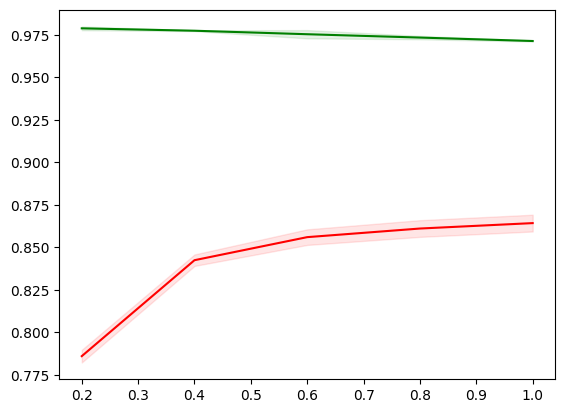

In [73]:
draw_learning_curve(best_svm_poly_model, X_train, y_train)

Score of on train are:
	- Accuracy score: 0.97
	- Micro F1 score: 0.97
	- Macro F1 score: 0.96
Score of on test are:
	- Accuracy score: 0.87
	- Micro F1 score: 0.87
	- Macro F1 score: 0.82


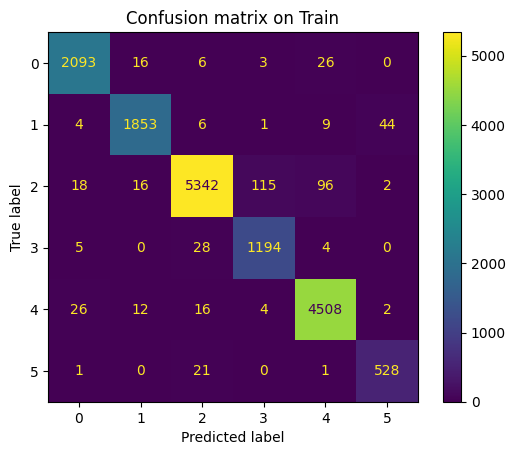

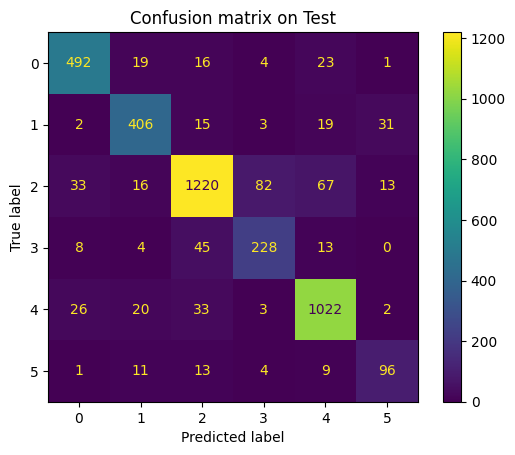

In [74]:
best_svm_poly_model.fit(X_train, y_train)
evaluate_model(best_svm_poly_model, X_train, X_test, y_train, y_test, include_training=True)

## Export model

All the kernels have almost the same result. 

Although polynomial kernel has 1% accuracy than the other models, I will choose linear kernel to be the best one because of its simplicity and interpretability.

In [8]:
best_svm_model = best_svm_linear_model

directory = "data/models/svm/"

dump(best_svm_model, directory + "best_svm_bow_model.joblib")

['data/models/svm/best_svm_bow_model.joblib']